# P07_survey

## Program to obtain the cross-tabulation of the gender question vs P01 (What master's program are you enrolled in?) and the corresponding frequency distribution graph

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import signal
from scipy.stats import norm
from scipy.stats import pearsonr
import statistics
import math

Tabla Cruzada:
P01      1   2
Genero        
1       16  11
2       48  33
3        3   1


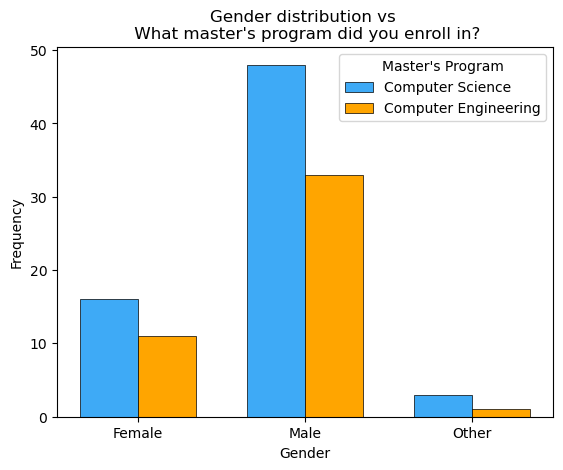

In [70]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to obtain the cross-tabulation, correlation coefficient, and frequency distribution graph
def analizar_columnas(df, col1, col2):
    # Map numeric values to descriptive labels
    genero_map = {1: 'Female', 2: 'Male', 3: 'Other'}
    programa_map = {1: 'Computer Science', 2: 'Computer Engineering'}
    
    # Get the cross-tabulation
    tabla_cruzada = pd.crosstab(df[col1], df[col2])
    print("Tabla Cruzada:")
    print(tabla_cruzada)
    
    # Plot the frequency distribution using matplotlib
    #fig, ax = plt.subplots(figsize=(10, 6))
    fig, ax = plt.subplots()
    
    # Get the unique categories of the columns
    categorias_col1 = sorted(df[col1].unique())  
    categorias_col2 = sorted(df[col2].unique())  
    
    # Create a grouped bar chart
    ancho_barra = 0.35  
    indices = range(len(categorias_col1))  

    # Define custom colors for the bars
    colores = ['#3eaaf6', '#ffa500']  # Colors
    
    for i, categoria_col2 in enumerate(categorias_col2):
        frecuencias = [tabla_cruzada.loc[categoria_col1, categoria_col2] for categoria_col1 in categorias_col1]
        ax.bar(
            [x + i * ancho_barra for x in indices], 
            frecuencias, 
            width=ancho_barra, 
            label=programa_map[categoria_col2], 
            color=colores[i], 
            edgecolor='black',  
            linewidth=0.5       
        )
    
    # Configure the graph
    
    ax.set_xlabel('Gender')
    ax.set_ylabel('Frequency')
    ax.set_title(f"Gender distribution vs \n What master's program did you enroll in?")
    ax.set_xticks([x + ancho_barra / 2 for x in indices])
    ax.set_xticklabels([genero_map[x] for x in categorias_col1])  # Descriptive labels for the x-axis
    ax.legend(title='''Master's Program''')

    plt.savefig('HisGenP01')
    #plt.show()

if __name__ == "__main__":
    # Data
    data = pd.read_csv('/Users/carlos/Documents/Programas_Python_GE/enc_datosnum.csv',delimiter=",",encoding = "ISO-8859-1")
    df = pd.DataFrame(data)
    
    analizar_columnas(df, 'Genero', 'P01')
